In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import re

In [2]:
file_path = "World_Development_Dataset.csv"
df = pd.read_csv(file_path)
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.042,32.4%,5102150.3,Botswana,6.0,66.0,409969.8,"$22,568,793,525",0.074,"$1,632",...,42.9,1.4,1,0.275,0.697,0.041,1519155,0.867,"$8,577,000,000","$704,000,000"
1,0.025,63.5%,2091377.5,Syrian Arab Republic,37.0,184.0,1200867.8,"$183,477,522,124",0.037,"$4,914",...,77.6,1.7,1,0.440,0.844,0.032,7012977,0.163,"$37,166,000,000","$404,000,000"
2,0.035,66.0%,3700837.2,Ecuador,44.0,77.0,2406610.8,"$5,494,252,208",0.221,"$7,180",...,58.5,2.3,1,0.317,0.743,0.121,5373054,0.597,"$3,000,000","$3,946,000,000"
3,0.012,44.6%,3242594.3,French Polynesia,110.0,175.0,511453.7,"$225,426,789,027",0.206,$128,...,83.8,0.3,1,0.412,0.621,0.185,1230985,0.946,"$1,623,000,000","$8,382,000,000"
4,0.012,55.4%,6350202.9,Cote d'Ivoire,72.0,18.0,1273730.2,"$526,425,740",0.115,"$3,624",...,82.9,0.5,1,0.261,0.642,0.090,6183484,0.961,"$676,000,000","$12,213,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100988,0.018,66.3%,6342826.0,Grenada,60.0,47.0,1093798.9,"$18,262,773,766",0.057,$681,...,77.1,0.8,1,0.209,0.570,0.125,12238791,0.770,"$2,340,000,000","$40,500,000"
100989,0.045,65.6%,5277509.2,Iceland,192.0,29.0,1634567.8,"$1,537,753,885",0.097,$622,...,65.8,1.9,1,0.303,0.702,0.032,1577984,0.805,"$51,000,000","$10,689,000,000"
100990,0.043,38.7%,7296390.0,American Samoa,115.0,107.0,2315448.4,"$25,978,563,316",0.186,$92,...,40.9,2.1,1,0.345,0.492,0.186,6689700,0.626,"$109,000,000","$22,787,000,000"
100991,0.047,25.3%,4842121.8,Kazakhstan,89.0,137.0,703589.0,"$161,207,304,960",0.151,"$3,624",...,82.6,2.1,1,0.431,0.606,0.033,32126351,0.624,"$639,000,000","$804,000,000"


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100993 entries, 0 to 100992
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Birth Rate              100993 non-null  float64
 1   Business Tax Rate       100993 non-null  object 
 2   CO2 Emissions           100993 non-null  float64
 3   Country                 100993 non-null  object 
 4   Days to Start Business  100993 non-null  float64
 5   Ease of Business        100993 non-null  float64
 6   Energy Usage            100993 non-null  float64
 7   GDP                     100993 non-null  object 
 8   Health Exp % GDP        100993 non-null  float64
 9   Health Exp/Capita       100993 non-null  object 
 10  Life Expectancy Female  100993 non-null  float64
 11  Life Expectancy Male    100993 non-null  float64
 12  Mobile Phone Usage      100993 non-null  float64
 13  Number of Records       100993 non-null  int64  
 14  Population 0-14     

In [4]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,100993.000000,1.009930e+05,100993.000000,100993.000000,1.009930e+05,100993.000000,100993.000000,100993.000000,100993.000000,100993.0,100993.000000,100993.000000,100993.000000,1.009930e+05,100993.000000
mean,0.030024,4.148041e+06,78.612023,94.772073,1.360708e+06,0.116672,62.546341,62.536058,1.270873,1.0,0.308666,0.665432,0.123669,3.133055e+07,0.541338
std,0.013283,2.394530e+06,76.655346,54.607799,7.900350e+05,0.062631,14.703907,14.726188,0.786363,0.0,0.110340,0.111035,0.069548,1.243158e+08,0.265155
min,0.007000,3.490000e+01,1.000000,1.000000,3.590000e+01,0.008000,37.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.018000,2.064675e+06,32.000000,48.000000,6.743004e+05,0.063000,49.900000,49.800000,0.600000,1.0,0.213000,0.570000,0.064000,9.432870e+05,0.312000
50%,0.030000,4.153750e+06,64.000000,94.000000,1.359661e+06,0.117000,62.600000,62.600000,1.300000,1.0,0.308000,0.664000,0.124000,5.865491e+06,0.541000
75%,0.042000,6.222310e+06,105.000000,142.000000,2.046570e+06,0.171000,75.300000,75.300000,1.900000,1.0,0.404000,0.762000,0.184000,2.010394e+07,0.771000
max,0.053000,8.286859e+06,694.000000,189.000000,2.727718e+06,0.225000,88.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


In [5]:
df.isna().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [14]:
def clean_numeric_column(column):
    return pd.to_numeric(column.replace({',': '', '%': '', '\$': ''}, regex=True), errors='coerce')

# Identifying relevant columns (excluding categorical ones)
numeric_columns = df.columns.difference(["Country", "Number of Records"])
df[numeric_columns] = df[numeric_columns].apply(clean_numeric_column)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Dharma Manasa\AppData\Local\Temp\ipykernel_10640\2332160381.py:2: SyntaxWarning: invalid escape sequence '\$'
  return pd.to_numeric(column.replace({',': '', '%': '', '\$': ''}, regex=True), errors='coerce')


In [26]:
sample_size = 5000
df_sampled = df.sample(n=sample_size, random_state=42)


In [27]:
X_sampled = df_sampled[numeric_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)


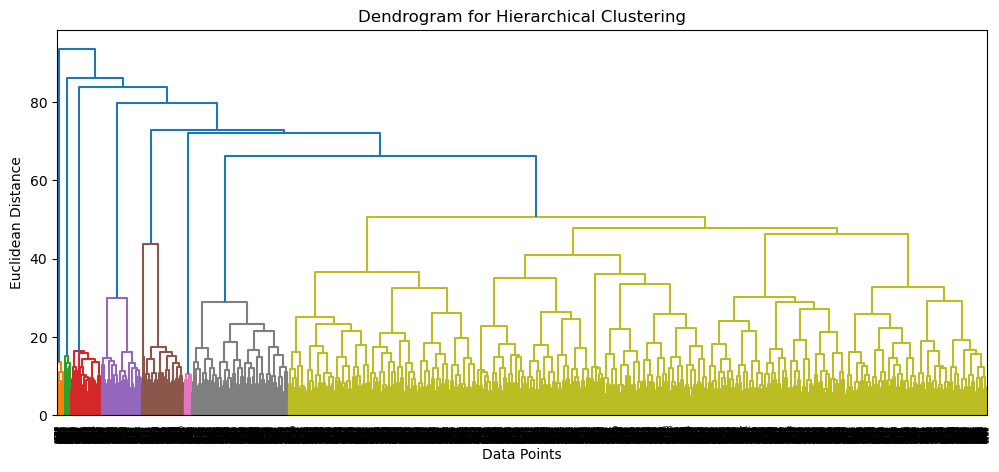

In [17]:
plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [18]:
silhouette_scores = {}
for n_clusters in range(2, 11):  # Testing from 2 to 10 clusters
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clustering.fit_predict(X_scaled)
    silhouette_scores[n_clusters] = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_scores[n_clusters]:.4f}")


Silhouette Score for 2 clusters: 0.5017
Silhouette Score for 3 clusters: 0.5046
Silhouette Score for 4 clusters: 0.2320
Silhouette Score for 5 clusters: 0.1885
Silhouette Score for 6 clusters: 0.1685
Silhouette Score for 7 clusters: 0.1763
Silhouette Score for 8 clusters: 0.0903
Silhouette Score for 9 clusters: 0.0430
Silhouette Score for 10 clusters: 0.0386


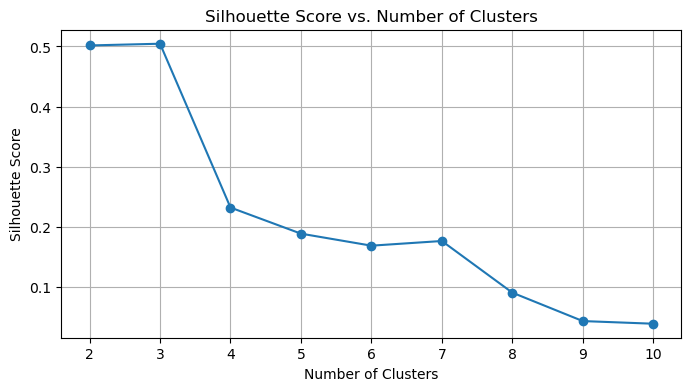

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='-')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


In [20]:
best_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal number of clusters based on Silhouette Score: {best_clusters}")


Optimal number of clusters based on Silhouette Score: 3


In [35]:
# Perform final clustering with the optimal number of clusters
final_clustering = AgglomerativeClustering(n_clusters=best_clusters, linkage='ward')
cluster_labels = final_clustering.fit_predict(X_scaled)

# Assign cluster labels to the dataset
df_sampled["Cluster"] = cluster_labels

# Check if clustering worked correctly
print("Unique clusters assigned:", np.unique(cluster_labels))

# Display first 10 rows with cluster assignments
print(df_sampled.head(10))


Unique clusters assigned: [0 1 2]
       Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
29690       0.052               54.1      3179823.7                   149.0   
13082       0.012              286.5      5542467.5                    41.0   
75931       0.050               66.4      6677377.4                   153.0   
98655       0.012               48.3      3772145.7                   192.0   
98958       0.031               66.6      5322840.5                    11.0   
58667       0.040               72.7      5503094.1                    60.0   
25116       0.048               66.6      7607376.2                    45.0   
2129        0.038               27.5      4024784.4                    23.0   
66444       0.017               60.5        83370.0                    52.0   
65762       0.028               50.1      3809387.0                     8.0   

       Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
29690             181.0